In [1]:

#pip install tensorflow

In [8]:
#!pip install --upgrade numpy scikit-learn
pwd

NameError: name 'pwd' is not defined

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16, MobileNetV2, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

# Define constants
batch_size = 32
input_shape = (224, 224, 3)

# Load data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/home/connectome/lsy0174/a-eye-lab-research/test/Train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/home/connectome/lsy0174/a-eye-lab-research/test/Test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Model definitions (ConvNet, VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121)
def create_model_convnet():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


Epoch 1/10
253/253 [==============================] - 86s 336ms/step - loss: 0.5011 - accuracy: 0.7702 - val_loss: 0.4009 - val_accuracy: 0.8206
Epoch 2/10
253/253 [==============================] - 84s 332ms/step - loss: 0.3185 - accuracy: 0.8670 - val_loss: 0.2527 - val_accuracy: 0.8894
Epoch 3/10
253/253 [==============================] - 84s 332ms/step - loss: 0.2257 - accuracy: 0.9062 - val_loss: 0.2123 - val_accuracy: 0.9112
Epoch 4/10
253/253 [==============================] - 84s 331ms/step - loss: 0.1841 - accuracy: 0.9286 - val_loss: 0.2061 - val_accuracy: 0.9100
Epoch 5/10
253/253 [==============================] - 84s 332ms/step - loss: 0.1162 - accuracy: 0.9551 - val_loss: 0.1767 - val_accuracy: 0.9287
Epoch 6/10
253/253 [==============================] - 84s 330ms/step - loss: 0.1015 - accuracy: 0.9616 - val_loss: 0.1385 - val_accuracy: 0.9531
Epoch 7/10
253/253 [==============================] - 84s 332ms/step - loss: 0.0793 - accuracy: 0.9703 - val_loss: 0.1393 - val_ac

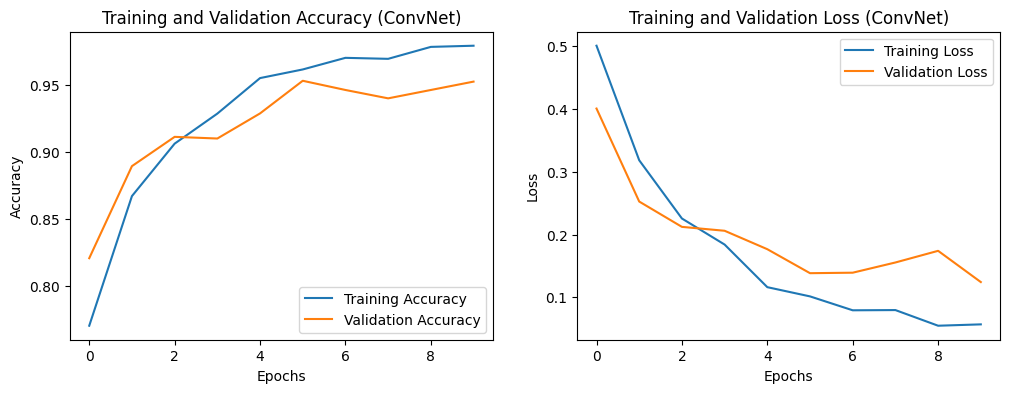

50/50 [==============================] - 5s 94ms/step - loss: 0.1243 - accuracy: 0.9525
Test Accuracy (ConvNet): 95.25%
50/50 [==============================] - 5s 94ms/step
Test AUC (ConvNet): 0.9914


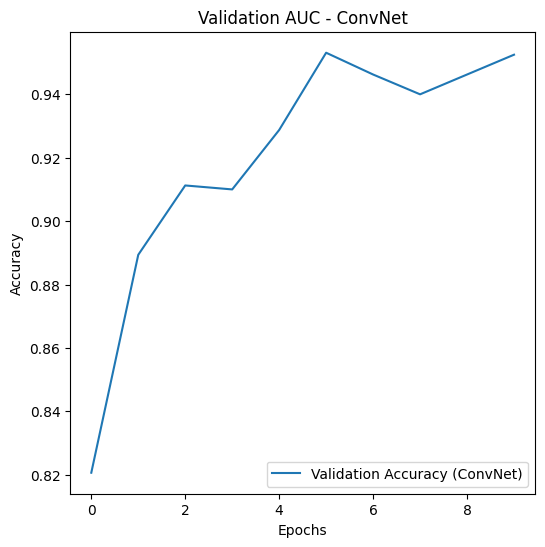

In [11]:
# Train and evaluate models
def train_and_evaluate_model(model, model_name):
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator
    )

    # Plotting accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({model_name})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss ({model_name})')
    plt.legend()

    plt.show()

    # Model Evaluation
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test Accuracy ({model_name}): {test_accuracy * 100:.2f}%')

    # Prediction and AUC calculation
    predictions = model.predict(test_generator)
    auc_score = roc_auc_score(test_generator.classes, predictions)
    print(f'Test AUC ({model_name}): {auc_score:.4f}')

    # Plotting AUC
    plt.figure(figsize=(6, 6))
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({model_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Validation AUC - {model_name}')
    plt.show()

# Train and evaluate all models
models = [create_model_convnet]  
model_names = ['ConvNet']  # 모델 이름 리스트에 VGG16, ResNet50 등 추가 필요

for i, model_func in enumerate(models):
    model = model_func()
    train_and_evaluate_model(model, model_names[i])

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
253/253 [==============================] - 83s 327ms/step - loss: 0.4761 - accuracy: 0.7755 - val_loss: 0.3300 - val_accuracy: 0.8562
Epoch 2/10
253/253 [==============================] - 82s 324ms/step - loss: 0.2871 - accuracy: 0.8798 - val_loss: 0.2390 - val_accuracy: 0.8994
Epoch 3/10
253/253 [==============================] - 82s 325ms/step - loss: 0.1988 - accuracy: 0.9196 - val_loss: 0.1602 - val_accuracy: 0.9325
Epoch 4/10
253/253 [==============================] - 82s 323ms/step - loss: 0.1453 - accuracy: 0.9465 - val_loss: 0.1662 - val_accuracy: 0.9344
Epoch 5/10
253/253 [==============================] - 82s 323ms/step - loss: 0.0975 - accuracy: 0.9613 - val_loss: 0.1387 - val_accuracy: 0.9456
Epoch 6/10
253/253 [==============================] - 82s 325ms/step - loss: 0.0761 - accuracy: 0.9716 - val_loss: 0.1387 - val_accuracy: 0.9475
Epoch 7/10
253/253 [==========================

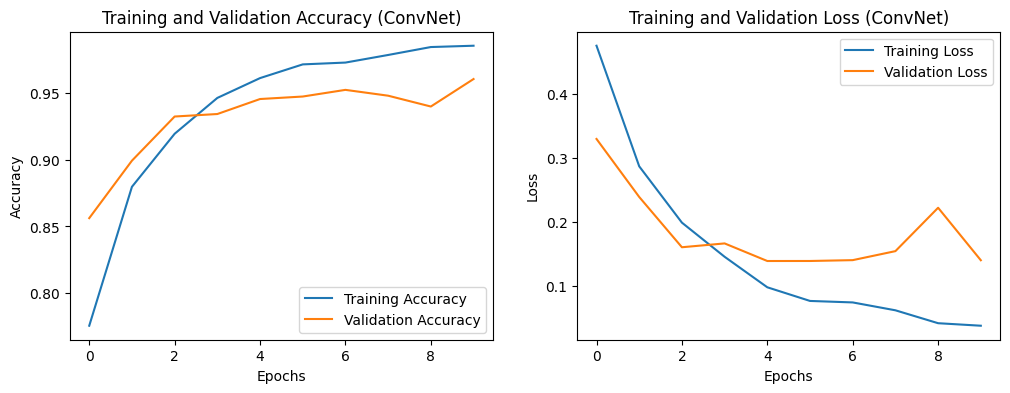

50/50 [==============================] - 5s 94ms/step - loss: 0.1399 - accuracy: 0.9606
Test Accuracy (ConvNet): 96.06%
50/50 [==============================] - 5s 94ms/step
Test AUC (ConvNet): 0.9909


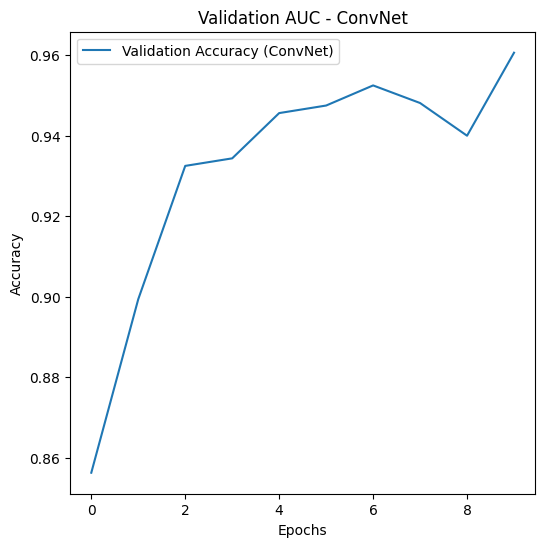

58889256/58889256 [==============================] - 4s 0us/step


Epoch 1/10
253/253 [==============================] - 418s 2s/step - loss: 0.3753 - accuracy: 0.8506 - val_loss: 0.2218 - val_accuracy: 0.9031
Epoch 2/10
253/253 [==============================] - 418s 2s/step - loss: 0.2007 - accuracy: 0.9162 - val_loss: 0.1516 - val_accuracy: 0.9369
Epoch 3/10
253/253 [==============================] - 417s 2s/step - loss: 0.1656 - accuracy: 0.9343 - val_loss: 0.1205 - val_accuracy: 0.9513
Epoch 4/10
253/253 [==============================] - 418s 2s/step - loss: 0.1482 - accuracy: 0.9372 - val_loss: 0.1240 - val_accuracy: 0.9556
Epoch 5/10
253/253 [==============================] - 418s 2s/step - loss: 0.1136 - accuracy: 0.9541 - val_loss: 0.0858 - val_accuracy: 0.9706
Epoch 6/10
253/253 [==============================] - 417s 2s/step - loss: 0.0966 - accuracy: 0.9615 - val_loss: 0.1073 - val_accuracy: 0.9531
Epoch 7/10
253/253 [==============================] - 418s 2s/step - loss: 0.1027 - accuracy: 0.9536 - val_loss: 0.0842 - val_accuracy: 0.9700

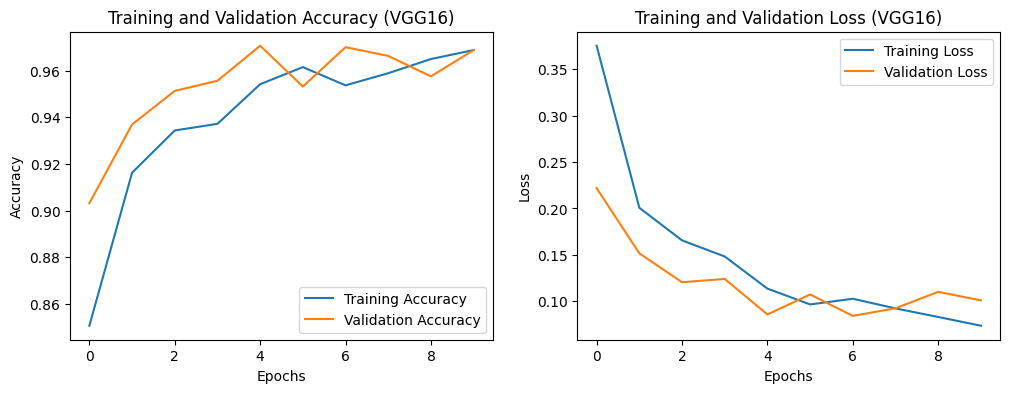

50/50 [==============================] - 69s 1s/step - loss: 0.1009 - accuracy: 0.9688
Test Accuracy (VGG16): 96.88%
50/50 [==============================] - 69s 1s/step
Test AUC (VGG16): 0.9952


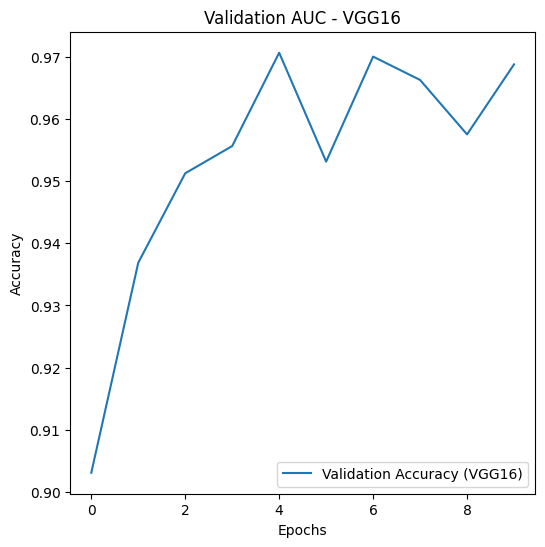

94765736/94765736 [==============================] - 7s 0us/step


Epoch 1/10
253/253 [==============================] - 190s 741ms/step - loss: 0.6908 - accuracy: 0.5480 - val_loss: 0.6763 - val_accuracy: 0.6513
Epoch 2/10
253/253 [==============================] - 187s 738ms/step - loss: 0.6827 - accuracy: 0.5554 - val_loss: 0.6891 - val_accuracy: 0.5013
Epoch 3/10
253/253 [==============================] - 186s 737ms/step - loss: 0.6773 - accuracy: 0.5595 - val_loss: 0.6811 - val_accuracy: 0.5106
Epoch 4/10
253/253 [==============================] - 186s 737ms/step - loss: 0.6672 - accuracy: 0.5708 - val_loss: 0.6629 - val_accuracy: 0.5706
Epoch 5/10
253/253 [==============================] - 186s 735ms/step - loss: 0.6607 - accuracy: 0.5839 - val_loss: 0.6593 - val_accuracy: 0.6056
Epoch 6/10
253/253 [==============================] - 186s 736ms/step - loss: 0.6514 - accuracy: 0.5892 - val_loss: 0.6312 - val_accuracy: 0.6781
Epoch 7/10
253/253 [==============================] - 187s 737ms/step - loss: 0.6416 - accuracy: 0.5959 - val_loss: 0.6255 -

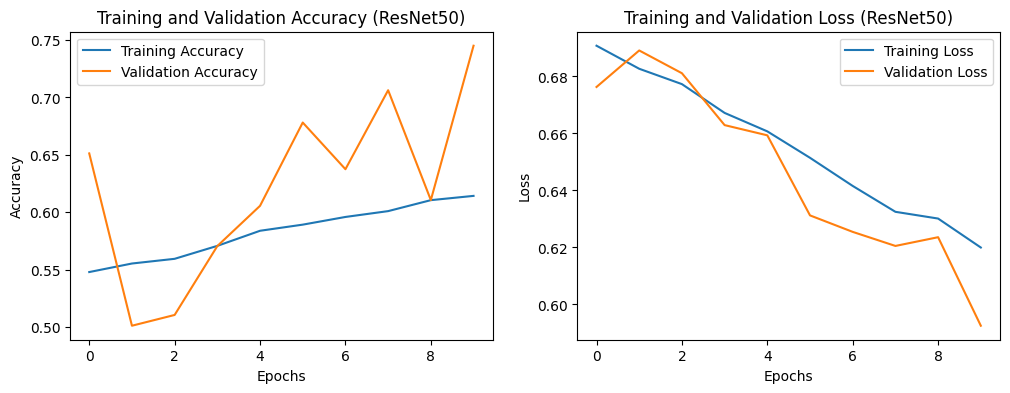

50/50 [==============================] - 31s 615ms/step - loss: 0.5925 - accuracy: 0.7450
Test Accuracy (ResNet50): 74.50%
50/50 [==============================] - 32s 615ms/step
Test AUC (ResNet50): 0.8098


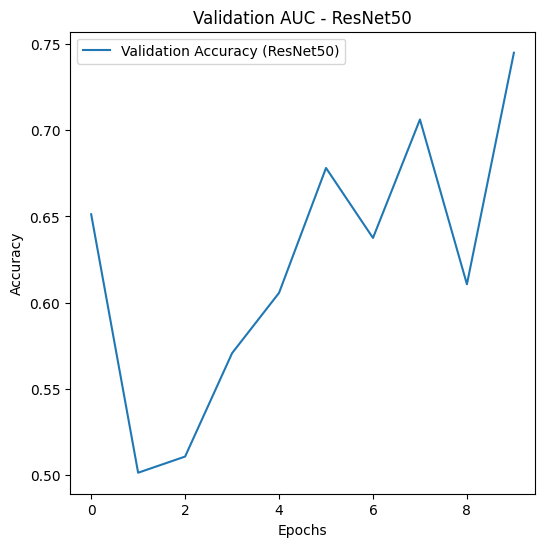

87910968/87910968 [==============================] - 7s 0us/step


Epoch 1/10
253/253 [==============================] - 106s 407ms/step - loss: 0.2401 - accuracy: 0.9010 - val_loss: 0.1596 - val_accuracy: 0.9344
Epoch 2/10
253/253 [==============================] - 102s 403ms/step - loss: 0.1282 - accuracy: 0.9504 - val_loss: 0.0978 - val_accuracy: 0.9600
Epoch 3/10
253/253 [==============================] - 102s 402ms/step - loss: 0.0965 - accuracy: 0.9648 - val_loss: 0.0773 - val_accuracy: 0.9731
Epoch 4/10
253/253 [==============================] - 102s 402ms/step - loss: 0.0788 - accuracy: 0.9709 - val_loss: 0.0969 - val_accuracy: 0.9550
Epoch 5/10
253/253 [==============================] - 102s 402ms/step - loss: 0.0790 - accuracy: 0.9703 - val_loss: 0.0595 - val_accuracy: 0.9769
Epoch 6/10
253/253 [==============================] - 102s 404ms/step - loss: 0.0671 - accuracy: 0.9741 - val_loss: 0.0561 - val_accuracy: 0.9794
Epoch 7/10
253/253 [==============================] - 102s 403ms/step - loss: 0.0585 - accuracy: 0.9791 - val_loss: 0.0573 -

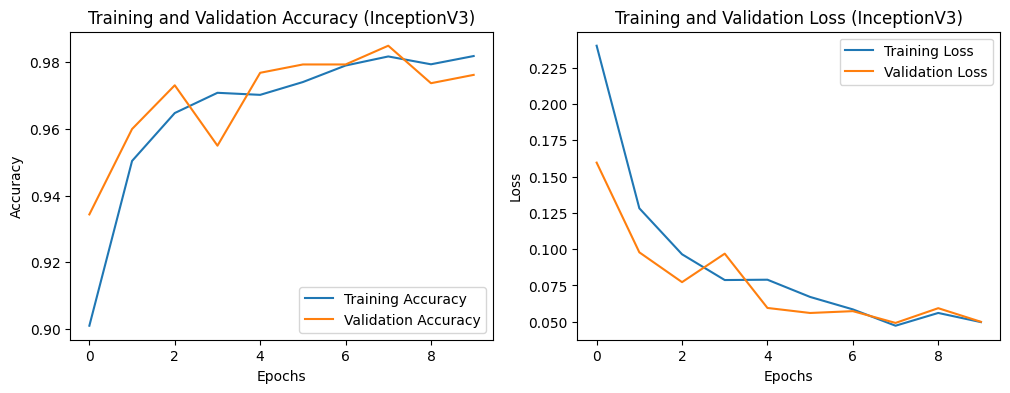

50/50 [==============================] - 17s 334ms/step - loss: 0.0500 - accuracy: 0.9762
Test Accuracy (InceptionV3): 97.62%
50/50 [==============================] - 18s 336ms/step
Test AUC (InceptionV3): 0.9987


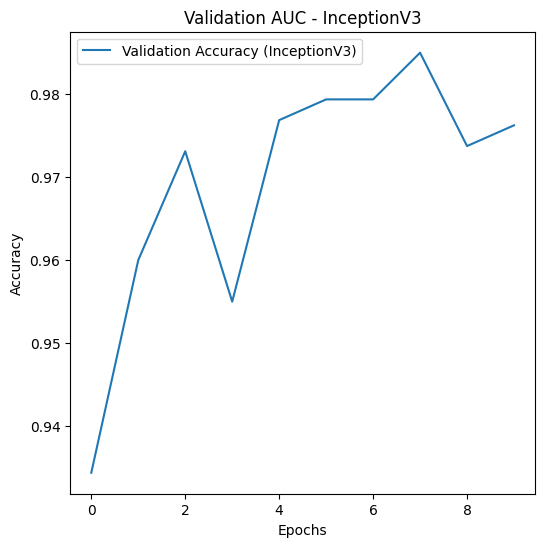

9406464/9406464 [==============================] - 0s 0us/step


Epoch 1/10
253/253 [==============================] - 56s 213ms/step - loss: 0.1759 - accuracy: 0.9305 - val_loss: 0.0748 - val_accuracy: 0.9762
Epoch 2/10
253/253 [==============================] - 53s 207ms/step - loss: 0.0629 - accuracy: 0.9779 - val_loss: 0.0488 - val_accuracy: 0.9844
Epoch 3/10
253/253 [==============================] - 53s 209ms/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 4/10
253/253 [==============================] - 53s 209ms/step - loss: 0.0364 - accuracy: 0.9874 - val_loss: 0.0219 - val_accuracy: 0.9944
Epoch 5/10
253/253 [==============================] - 53s 209ms/step - loss: 0.0266 - accuracy: 0.9905 - val_loss: 0.0176 - val_accuracy: 0.9944
Epoch 6/10
253/253 [==============================] - 53s 209ms/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0284 - val_accuracy: 0.9881
Epoch 7/10
253/253 [==============================] - 53s 209ms/step - loss: 0.0174 - accuracy: 0.9937 - val_loss: 0.0322 - val_ac

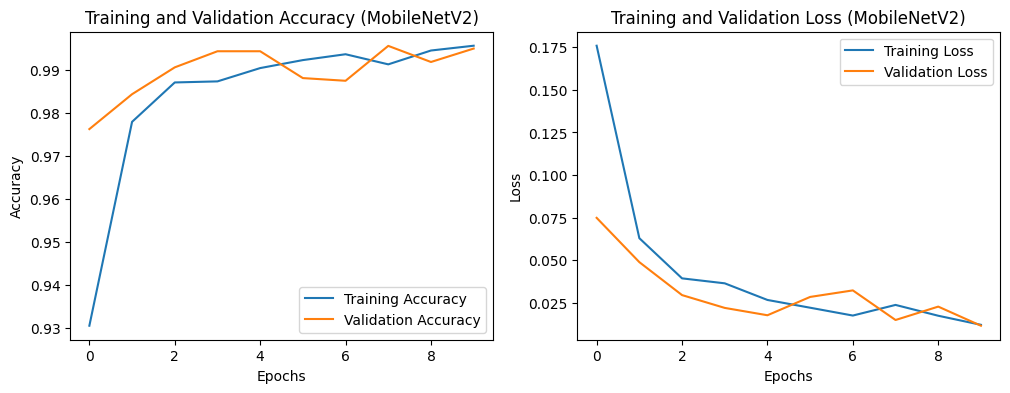

50/50 [==============================] - 9s 172ms/step - loss: 0.0115 - accuracy: 0.9950
Test Accuracy (MobileNetV2): 99.50%
50/50 [==============================] - 9s 173ms/step
Test AUC (MobileNetV2): 0.9999


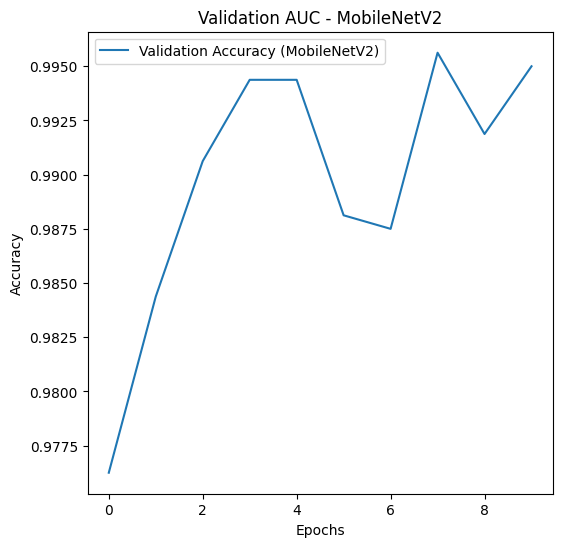

29084464/29084464 [==============================] - 2s 0us/step


Epoch 1/10
253/253 [==============================] - 168s 647ms/step - loss: 0.1958 - accuracy: 0.9210 - val_loss: 0.0908 - val_accuracy: 0.9725
Epoch 2/10
253/253 [==============================] - 162s 641ms/step - loss: 0.0908 - accuracy: 0.9658 - val_loss: 0.0502 - val_accuracy: 0.9862
Epoch 3/10
253/253 [==============================] - 162s 641ms/step - loss: 0.0631 - accuracy: 0.9772 - val_loss: 0.0370 - val_accuracy: 0.9894
Epoch 4/10
253/253 [==============================] - 162s 642ms/step - loss: 0.0459 - accuracy: 0.9849 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 5/10
253/253 [==============================] - 162s 640ms/step - loss: 0.0408 - accuracy: 0.9854 - val_loss: 0.0277 - val_accuracy: 0.9931
Epoch 6/10
253/253 [==============================] - 162s 640ms/step - loss: 0.0322 - accuracy: 0.9890 - val_loss: 0.0208 - val_accuracy: 0.9950
Epoch 7/10
253/253 [==============================] - 162s 640ms/step - loss: 0.0277 - accuracy: 0.9897 - val_loss: 0.0171 -

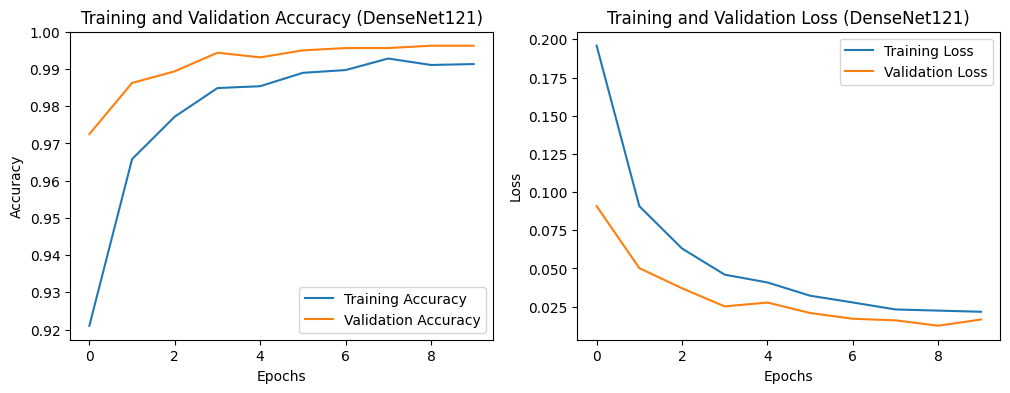

50/50 [==============================] - 27s 533ms/step - loss: 0.0166 - accuracy: 0.9962
Test Accuracy (DenseNet121): 99.62%
50/50 [==============================] - 28s 533ms/step
Test AUC (DenseNet121): 0.9998


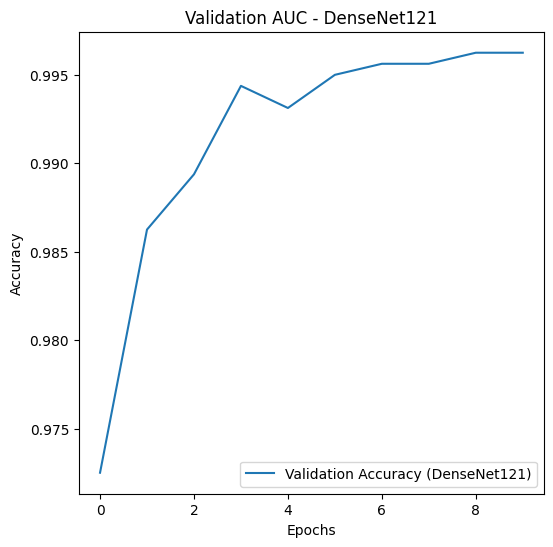

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

# Define constants
batch_size = 32
input_shape = (224, 224, 3)

# Load data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
     '/home/connectome/lsy0174/a-eye-lab-research/test/Train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/home/connectome/lsy0174/a-eye-lab-research/test/Test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Model definitions
def create_model_convnet():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_inceptionv3():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_mobilenetv2():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_densenet121():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
def train_and_evaluate_model(model, model_name):
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator
    )

    # Plotting accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({model_name})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss ({model_name})')
    plt.legend()

    plt.show()

    # Model Evaluation
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f'Test Accuracy ({model_name}): {test_accuracy * 100:.2f}%')

    # Prediction and AUC calculation
    predictions = model.predict(test_generator)
    auc_score = roc_auc_score(test_generator.classes, predictions)
    print(f'Test AUC ({model_name}): {auc_score:.4f}')

    # Plotting AUC
    plt.figure(figsize=(6, 6))
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({model_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Validation AUC - {model_name}')
    plt.show()

# Train and evaluate all models
models = [
    create_model_convnet,
    create_model_vgg16,
    create_model_resnet50,
    create_model_inceptionv3,
    create_model_mobilenetv2,
    create_model_densenet121
]

model_names = ['ConvNet', 'VGG16', 'ResNet50', 'InceptionV3', 'MobileNetV2', 'DenseNet121']

for i, model_func in enumerate(models):
    model = model_func()
    train_and_evaluate_model(model, model_names[i])
